In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def DFT(x):
    return np.fft.fft(x, norm='ortho')

def IDFT(x):
    return np.real(np.fft.ifft(x, norm='ortho'))

Let us consider a vector $X$ in the DFT basis, that has a single pair of spikes at X[3] and X[-3]. Let n = 50 for this case.

<Container object of 3 artists>

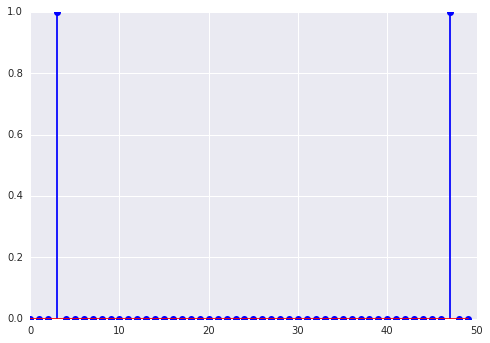

In [2]:
X = [0] * 50
X[3] = 1
X[-3] = 1
plt.stem(X)

Now let's look at this in the time domain:

<Container object of 3 artists>

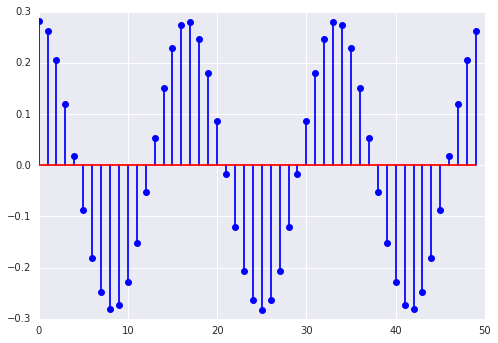

In [3]:
x = IDFT(X)
plt.stem(x)

Now, let's try setting n = 100, but still set X[-3] and X[3] = 1. This is the equivalent of inserting 50 zeros in the middle of $X$

<Container object of 3 artists>

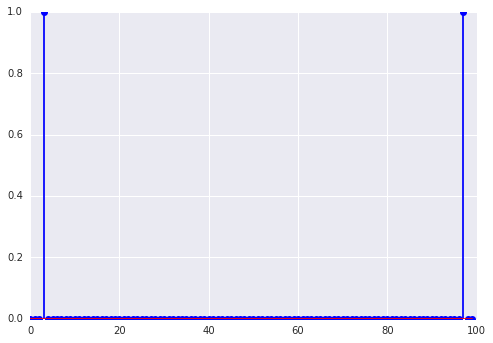

In [4]:
X1 = [0] * 100
X1[3] = 1
X1[-3] = 1
plt.stem(X1)

<Container object of 3 artists>

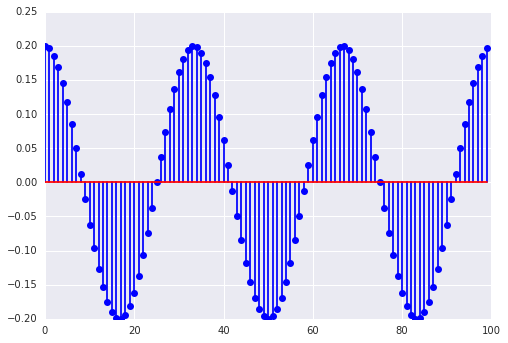

In [5]:
x1 = IDFT(X1)
plt.stem(x1)

Notice how the same sinusoid is reproduced, just with more samples (and a different amplitude).

Below is an interactive animation of the same thing, with the signal being a linear combination of two sinusoids of different frequencies. Notice how as i increases, the amplitude of the time domain signal decreases

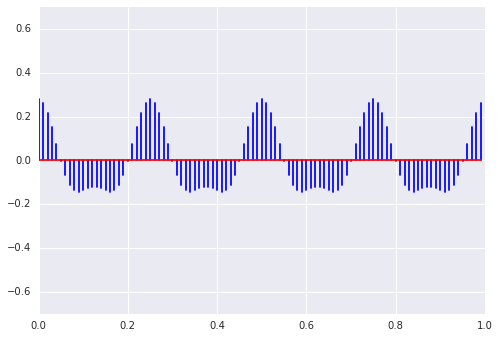

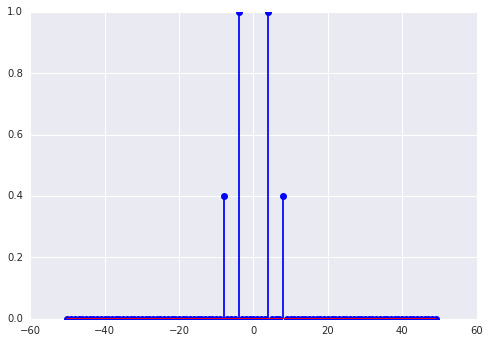

In [6]:
from IPython.html.widgets import interact, IntSlider
@interact(i=IntSlider(min=20, max=200,step=8,value=0))
def plot(i):
    X1 = np.zeros(i)
    X1[4] = 1
    X1[-4] = 1
    X1[8] = .4
    X1[-8] = .4
    x1 = IDFT(X1)
    plt.stem(np.linspace(0,1,i,endpoint=False), x1, markerfmt=" ")
    axes = plt.gca()
    axes.set_ylim([-.7,.7])
    plt.show()
    plt.stem(np.linspace(-i//2,i//2,i,endpoint=False), np.roll(X1, i//2))

We can add a correction factor to compensate for this

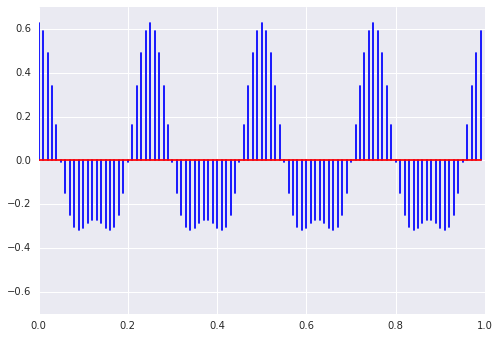

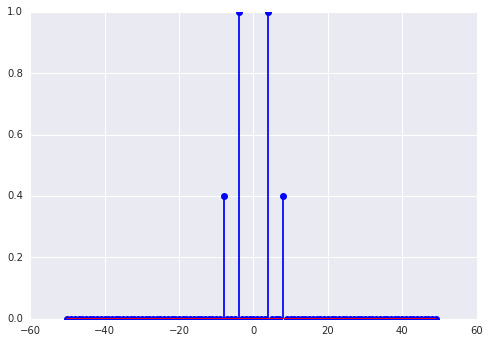

In [7]:
from IPython.html.widgets import interact, IntSlider
@interact(i=IntSlider(min=20, max=200,step=8,value=0))
def plot(i):
    X1 = np.zeros(i)
    X1[4] = 1
    X1[-4] = 1
    X1[8] = .4
    X1[-8] = .4
    x1 = IDFT(X1) * np.sqrt(i/20)
    plt.stem(np.linspace(0,1,i,endpoint=False), x1, markerfmt=" ")
    axes = plt.gca()
    axes.set_ylim([-.7,.7])
    plt.show()
    plt.stem(np.linspace(-i//2,i//2,i,endpoint=False), np.roll(X1, i//2))
